In [34]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from numpy.linalg import solve

### Tutorial 3: Question 1(b)
We seek to solve the heat conduction problem
\begin{align}
u_t &= u_{xx},\quad -L<x<L,\quad t>0; \\
u(x,0) &= \begin{cases} 1,& \quad x>3 \\ 0,&\quad \text{otherwise}\end{cases}
\end{align}
with periodic boundary conditions
\begin{equation}
u(-L,t)=u(L,t),\quad u_x(-L,t)=u(L,t).
\end{equation}
Further, we seek to explain the difference in the evolution of the solution compare to the
zero boundary conditions.

Defining all the parameters, space domain, and time domain.

In [35]:
h, k = 0.5, 0.0025
alpha = 1
xstart, xstop = [-10, 10]
tstart, tstop = [0, 40]

x = np.arange(xstart, xstop + h, h)
t = np.arange(tstart, tstop + k, k)
m, n = len(x), len(t)

Defining the initial condition.

In [36]:
initial_conditions = [1 if i>3 else 0 for i in x]

Let $\vec{u}$ be the vector such that $\vec{u}=(u_{0j},u_{1j},\ldots,u_{m-1j})$ for each $j=1,2,\ldots$.

In [37]:
u = np.zeros((m,n))
u[:,0] = initial_conditions

The heat equation
\begin{equation}
\frac{\partial u_{ij}}{\partial t} = \alpha\frac{\partial^2 u_{ij}}{\partial u_{ij}^2}
\end{equation}
can be expressed using the approximation for the second derivative
\begin{equation}
\frac{\partial u_{ij}}{\partial t} = \frac{\alpha}{h^2} \left[ u_{i+1,j} - 2u_{i,j} + u_{i-1,j} \right] +O(h^2).
\end{equation}

Since the boundary conditions are periodic we have that
\begin{align}
u_{m,j} &= u_{0,j} \\
u_{-1,j} &= u_{m-1,j}
\end{align}
for each $j=1,2,\ldots$.

Let $d\vec{v}/dt = G(\vec{v})$, then we have that
\begin{equation}
G(\vec{v})=A\vec{v}
\end{equation}
where the matrix $A$ is of the form
\begin{equation}
A=\frac{\alpha}{h^2}
\begin{pmatrix}
-2 & 1 & 0 & \cdots & 0 & 1 \\
1 & -2 & 1 & 0 & \cdots & 0 \\
\vdots &  &  &  &  & \vdots \\
0 & \cdots & 0 & 1 & -2 & 1 \\
1 & 0 & \cdots & 0 & 1 & -2 \\
\end{pmatrix}
\end{equation}

The Forward Euler Scheme says that 
\begin{equation}
\vec{u}^{\,(j+1)} = \vec{u}^{\,(j)} + kA\vec{u}^{\,(j)}
\end{equation}
which can be re-written as
\begin{equation}
u_{i,j+1} = u_{i,j} + s\left[v_{i+1,j} -2v_{i,j} + v_{i-1,j}\right]
\end{equation}
where $s\equiv \alpha^2 k/h^2$.

This can be written more simply as
\begin{equation}
\vec{u}^{\,(j+1)}=B\vec{u}^{\,(j)}
\end{equation}
where
\begin{equation}
B=
\begin{pmatrix}
1-2s & s & 0 & \cdots & 0 & s \\
s & 1-2s & s & 0 & \cdots & 0 \\
\vdots &  &  &  &  & \vdots \\
0 & \cdots & 0 & s & 1-2s & s \\
s & 0 & \cdots & 0 & s & 1-2s \\
\end{pmatrix}
\end{equation}


Defining $s$ and $B$ as `s` and the array `B` respectively.

In [38]:
s = alpha ** 2 * (k/h**2)
B = np.diag([1 - 2 * s] * m) + np.diag([s] * (m - 1), -1) + np.diag([s] * (m - 1), 1)
B[(0,m-1)] = s
B[(m-1,0)] = s

Then $\vec{u}^{\,(j+1)}$ is obtained from $\vec{u}^{\,(j)}$ by a simple matrix multiplication.

In [39]:
for j in range(1, n):
    col = u[:, j - 1].copy()
    u[:, j] = np.matmul(B, col)

Plotting `x`, `t` and `u`.

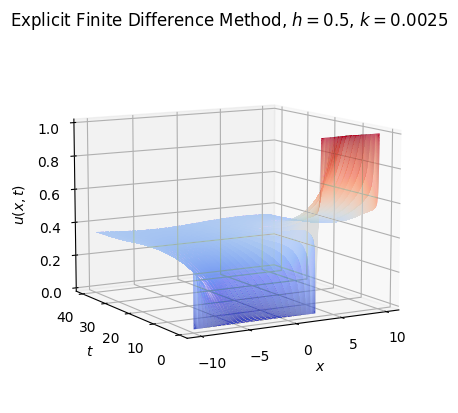

In [40]:
xv, tv = np.meshgrid(x, t)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xv, tv, u.T, cmap=cm.coolwarm, rstride=1, cstride=1)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$t$')
ax.set_zlabel(r'$u(x,t)$', rotation=90)
ax.set_title(r'Explicit Finite Difference Method, $h={}$, $k={}$'.format(h, k))
ax.view_init(elev=10, azim=-120)
ax.zaxis.set_rotate_label(False)
plt.show()

We can also implement the implicit scheme with periodic boundary conditions. Defining the same parameters, space domain, time domain and initial conditions as in the explicit scheme.

In [41]:
h, k = 0.5, 0.0025
alpha = 1
xstart, xstop = [-10, 10]
tstart, tstop = [0, 40]

x = np.arange(xstart, xstop + h, h)
t = np.arange(tstart, tstop + k, k)
m, n = len(x), len(t)

initial_conditions = [1 if i>3 else 0 for i in x]

Let $\vec{u}$ be the vector such that $\vec{u}=(u_{0j},u_{1j},\ldots,u_{m-1j})$ for each $j=1,2,\ldots$.

In [42]:
u = np.zeros((m,n))
u[:,0] = initial_conditions

Let $s\equiv \alpha^2 k/h^2$. We need to solve $A\vec{u}^{\,(j)}=\vec{u}^{\,(j-1)}$ for each $j=1,2,\ldots$ where
\begin{equation}
A=
\begin{pmatrix}
1+2s & -s & 0 & \cdots & 0 & -s \\
-s & 1+2s & -s & 0 & \cdots & 0 \\
\vdots &  &  &  &  & \vdots \\
0 & \cdots & 0 & -s & 1+2s & -s \\
-s & 0 & \cdots & 0 & -s & 1+2s \\
\end{pmatrix}
\end{equation}

In [43]:
s = alpha**2 * (k/h**2)

A = np.diag([1 + 2 * s] * m) + np.diag([-s] * (m - 1), -1) + np.diag([-s] * (m - 1), 1)
A[(0,m-1)] = -s
A[(m-1,0)] = -s

Solving $\vec{u}^{\,(j)}$ for each $j=1,2,\ldots$.

In [44]:
for j in range(1, n):
    b = u[:,j-1].copy()
    u[:,j] = solve(A, b)

Plotting `x`, `t` and `u`.

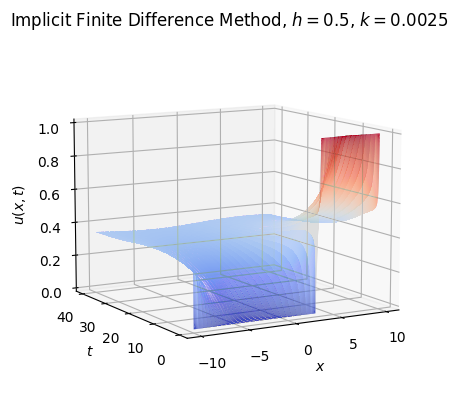

In [45]:
xv, tv = np.meshgrid(x, t)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xv, tv, u.T, cmap=cm.coolwarm, rstride=1, cstride=1)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$t$')
ax.set_zlabel(r'$u(x,t)$', rotation=90)
ax.set_title(r'Implicit Finite Difference Method, $h={}$, $k={}$'.format(h, k))
ax.view_init(elev=10, azim=-120)
ax.zaxis.set_rotate_label(False)
plt.show()